In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('very_dirty_employee_dataset.csv')

In [3]:
df

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount
0,1,55,Male,Sales,165949.0,2023-07-31,20,Hyderabad,unknown,6,107,N,Startup,NaN,2502
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2,396,NaN,NaN,yes,6073
2,3,31,NaN,,152294.0,2015-12-05,5,Bangalore,NaN,83,10,Yes,Startup,1,1949
3,4,59,F,HR,48835.0,2020-01-11,21,Delhi,Graduate,66,50,NaN,Enterprise,NaN,24604
4,5,24,unknown,NaN,186632.0,2024-10-23,4,Hyderabad,PhD,70,360,No,NaN,yes,32333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,19,M,Sales,184140.0,2011-10-24,6,Delhi,Graduate,41,239,NaN,MNC,NaN,43031
99996,99997,39,F,IT,38618.0,2013-03-02,13,Bangalore,NaN,48,379,N,Enterprise,no,7822
99997,99998,26,F,NaN,100321.0,2023-06-10,22,NaN,Graduate,92,4,Yes,Startup,no,589
99998,99999,63,Male,,43409.0,2014-07-26,12,Hyderabad,NaN,37,269,Yes,Startup,yes,26546


In [4]:
df.isnull().sum()

employee_id              0
age                   3828
gender               16841
department           14376
salary                   2
joining_date            22
experience_years      2292
city                 16634
education_level      20197
performance_score      987
training_hours         198
promotion_status     20156
company_type         25113
attrition_flag       20053
bonus_amount             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   employee_id        100000 non-null  int64  
 1   age                96172 non-null   object 
 2   gender             83159 non-null   object 
 3   department         85624 non-null   object 
 4   salary             99998 non-null   float64
 5   joining_date       99978 non-null   object 
 6   experience_years   97708 non-null   object 
 7   city               83366 non-null   object 
 8   education_level    79803 non-null   object 
 9   performance_score  99013 non-null   object 
 10  training_hours     99802 non-null   object 
 11  promotion_status   79844 non-null   object 
 12  company_type       74887 non-null   object 
 13  attrition_flag     79947 non-null   object 
 14  bonus_amount       100000 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 11

In [6]:
df.shape

(100000, 15)

In [7]:
df.describe()

,employee_id,salary,bonus_amount
count,100000.000000,99998.000000,100000.000000
mean,50000.500000,109839.243905,24980.700130
std,28867.657797,51961.790196,14436.820298
min,1.000000,20000.000000,0.000000
25%,25000.750000,64818.500000,12488.750000
50%,50000.500000,109816.000000,24922.500000
75%,75000.250000,154516.750000,37486.000000
max,100000.000000,199998.000000,49999.000000


# Data Cleaning with 15 BUSINESS PROBLEMS AND SOLUTIONS

# Which departments have the highest employee attrition rate and how does it impact overall workforce stability?

In [8]:
df.head(4)

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount
0,1,55,Male,Sales,165949.0,2023-07-31,20,Hyderabad,unknown,6,107,N,Startup,NaN,2502
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2,396,NaN,NaN,yes,6073
2,3,31,NaN,,152294.0,2015-12-05,5,Bangalore,NaN,83,10,Yes,Startup,1,1949
3,4,59,F,HR,48835.0,2020-01-11,21,Delhi,Graduate,66,50,NaN,Enterprise,NaN,24604


In [9]:
# df['department'].unique()
df['department'] = df['department'].replace(' ',pd.NA)
# df = df.dropna(subset=['department'])
# df['department'] = df['department'].fillna(df['department'].mean())
# # print(df['attrition_flag'])

In [10]:
df = df.dropna(subset=['department'])

In [11]:
df['department'] = df['department'].fillna('unknown')

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\1828514208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].fillna('unknown')


In [12]:
df['department'].unique()

array(['Sales', 'Finance', 'HR', 'IT', 'Marketing'], dtype=object)

In [13]:
print(df['attrition_flag'])

0        NaN
1        yes
3        NaN
5          1
7        NaN
        ... 
99991    yes
99992      0
99993      1
99995    NaN
99996     no
Name: attrition_flag, Length: 71439, dtype: object


In [14]:
attration_maps = {
    '1' : 'Yes',
    '0' : 'No',
    'no':  'No',
    'yes': 'Yes',
    'Nan':'unknown'
}
df['attrition_flag'] = df['attrition_flag'].map(attration_maps)

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\3130042852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attrition_flag'] = df['attrition_flag'].map(attration_maps)


In [15]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount
0,1,55,Male,Sales,165949.0,2023-07-31,20,Hyderabad,unknown,6,107,N,Startup,NaN,2502
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2,396,NaN,NaN,Yes,6073
3,4,59,F,HR,48835.0,2020-01-11,21,Delhi,Graduate,66,50,NaN,Enterprise,NaN,24604
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63,311,Yes,NaN,Yes,19746
7,8,35,NaN,Finance,135832.0,2013-06-26,five,Mumbai,NaN,38,203,N,Enterprise,NaN,37004


In [16]:
df = df.dropna(subset=['attrition_flag'])

In [17]:
attration_rates = df.groupby('department')['attrition_flag'].value_counts().reset_index()
attration_rates

,department,attrition_flag,count
0,Finance,No,5685
1,Finance,Yes,5614
2,HR,Yes,5712
3,HR,No,5658
4,IT,No,5839
5,IT,Yes,5719
6,Marketing,Yes,5775
7,Marketing,No,5632
8,Sales,Yes,5833
9,Sales,No,5671


In [18]:
fig = px.bar(
    attration_rates,
    x='department',
    y='count',
    color='attrition_flag',
    labels = {'count':'Total Count','department':'Department'},
    barmode='group'
)
fig.show()

In [19]:
# How does employee salary level influence job satisfaction and performance ratings across departments?

In [20]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2,396,NaN,NaN,Yes,6073
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63,311,Yes,NaN,Yes,19746
13,14,56,unknown,Marketing,29587.0,2017-11-26,9,Mumbai,PhD,73,252,No,MNC,Yes,30265
14,15,40,F,Marketing,116016.0,2015-09-02,ten,delhi,Graduate,82,123,N,NaN,Yes,19670
15,16,19,unknown,Finance,31827.0,2013-05-11,18,Bangalore,Post Graduate,83,189,Yes,NaN,No,22793


In [21]:
df['performance_score'].unique()

array(['2', '63', '73', '82', '83', '11', '42', '70', '23', '48', nan,
       '45', '100', '56', '28', '38', '59', '18', '71', '86', '76', '57',
       '35', '17', '39', '32', '61', '34', '14', '74', '84', '67', '90',
       '25', '97', '81', '1', '36', '33', '88', '68', '10', '62', '21',
       '24', '66', '15', '75', '13', '22', 'high', '80', '9', '99', '5',
       '50', '8', '78', '95', '96', '41', '64', '40', '93', 'low', '87',
       '46', '37', '85', '7', '16', '79', '77', '54', '19', '27', '26',
       '65', '47', '51', '31', '29', '53', '91', '43', '92', '72', '89',
       '3', '49', '30', '44', '58', '94', '60', '20', '98', '52', '69',
       '55', '12', '4', '6'], dtype=object)

In [22]:
df['performance_score'] = pd.to_numeric(df['performance_score'],errors='coerce')

In [23]:
df['performance_score'].unique()

array([  2.,  63.,  73.,  82.,  83.,  11.,  42.,  70.,  23.,  48.,  nan,
        45., 100.,  56.,  28.,  38.,  59.,  18.,  71.,  86.,  76.,  57.,
        35.,  17.,  39.,  32.,  61.,  34.,  14.,  74.,  84.,  67.,  90.,
        25.,  97.,  81.,   1.,  36.,  33.,  88.,  68.,  10.,  62.,  21.,
        24.,  66.,  15.,  75.,  13.,  22.,  80.,   9.,  99.,   5.,  50.,
         8.,  78.,  95.,  96.,  41.,  64.,  40.,  93.,  87.,  46.,  37.,
        85.,   7.,  16.,  79.,  77.,  54.,  19.,  27.,  26.,  65.,  47.,
        51.,  31.,  29.,  53.,  91.,  43.,  92.,  72.,  89.,   3.,  49.,
        30.,  44.,  58.,  94.,  60.,  20.,  98.,  52.,  69.,  55.,  12.,
         4.,   6.])

In [24]:
df = df.dropna(subset=['performance_score'])

In [25]:
bins = [10,20,50,75,100]
labels = ['Low performance','Average performance','high performance','Excellent performance']
df['level_performance_score'] = pd.cut(df['performance_score'],bins=bins , labels=labels)

In [26]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2.0,396,NaN,NaN,Yes,6073,NaN
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63.0,311,Yes,NaN,Yes,19746,high performance
13,14,56,unknown,Marketing,29587.0,2017-11-26,9,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance
14,15,40,F,Marketing,116016.0,2015-09-02,ten,delhi,Graduate,82.0,123,N,NaN,Yes,19670,Excellent performance
15,16,19,unknown,Finance,31827.0,2013-05-11,18,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance


In [27]:
df['level_performance_score'].unique()

[NaN, 'high performance', 'Excellent performance', 'Low performance', 'Average performance']
Categories (4, object): ['Low performance' < 'Average performance' < 'high performance' < 'Excellent performance']

In [28]:
df = df.dropna(subset=['salary'])

In [29]:
pivot_table = pd.pivot_table(
    df,
    index="department",
    columns="level_performance_score",
    values="salary",
    aggfunc="mean"
)


C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\2271433093.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [30]:
pivot_table

level_performance_score,Low performance,Average performance,high performance,Excellent performance
department,,,,
Finance,110586.098056,109117.813785,111231.559456,110350.172326
HR,110359.114475,109929.283104,108920.132327,109633.116959
IT,108683.000000,110175.135053,110005.786228,111032.173529
Marketing,108173.808889,111667.851627,110581.423573,108619.960812
Sales,108738.148936,109867.853887,110346.475792,109515.695238


In [31]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2.0,396,NaN,NaN,Yes,6073,NaN
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63.0,311,Yes,NaN,Yes,19746,high performance
13,14,56,unknown,Marketing,29587.0,2017-11-26,9,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance
14,15,40,F,Marketing,116016.0,2015-09-02,ten,delhi,Graduate,82.0,123,N,NaN,Yes,19670,Excellent performance
15,16,19,unknown,Finance,31827.0,2013-05-11,18,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance


In [32]:
df['promotion_status'].unique()

array([nan, 'Yes', 'No', 'N', 'Y'], dtype=object)

In [33]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2.0,396,NaN,NaN,Yes,6073,NaN
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63.0,311,Yes,NaN,Yes,19746,high performance
13,14,56,unknown,Marketing,29587.0,2017-11-26,9,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance
14,15,40,F,Marketing,116016.0,2015-09-02,ten,delhi,Graduate,82.0,123,N,NaN,Yes,19670,Excellent performance
15,16,19,unknown,Finance,31827.0,2013-05-11,18,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance


In [34]:
promotion_status = {
    'Y':'Yes',
    'N':'No',
    'Yes':'Yes',
    'No' :'No',
    'NaN':'NaN'
}
df['promotion_status'] = df['promotion_status'].map(promotion_status)

In [35]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score
1,2,45,M,Finance,76184.0,2010-05-17,9,Hyderabad,Post Graduate,2.0,396,NaN,NaN,Yes,6073,NaN
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63.0,311,Yes,NaN,Yes,19746,high performance
13,14,56,unknown,Marketing,29587.0,2017-11-26,9,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance
14,15,40,F,Marketing,116016.0,2015-09-02,ten,delhi,Graduate,82.0,123,No,NaN,Yes,19670,Excellent performance
15,16,19,unknown,Finance,31827.0,2013-05-11,18,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance


In [36]:
df = df.dropna(subset=['promotion_status'])

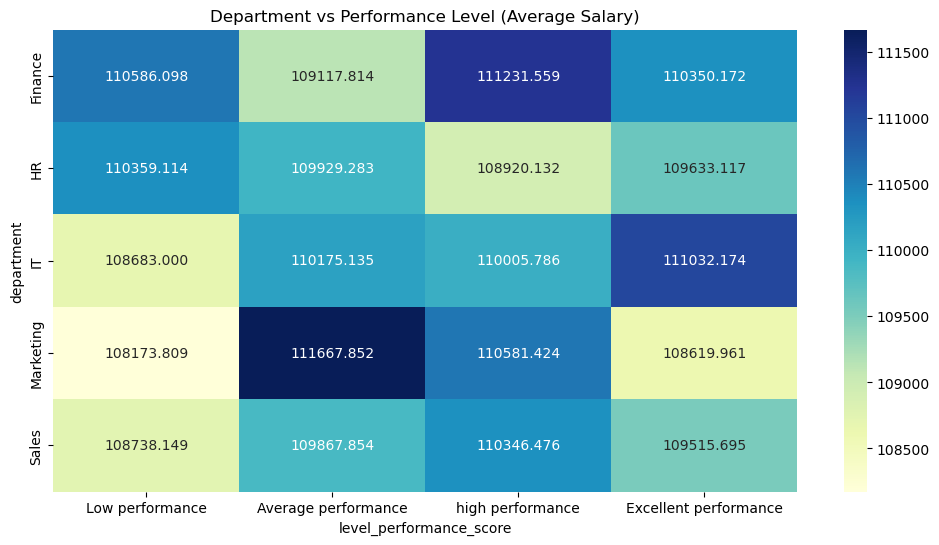

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="YlGnBu",
    fmt=".3f"
)
plt.title("Department vs Performance Level (Average Salary)")
plt.show()


# Proformance vs promotion_status	

In [38]:
performance_vs = df.groupby('level_performance_score')['promotion_status'].value_counts().reset_index()
performance_vs

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\1030724130.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,level_performance_score,promotion_status,count
0,Low performance,Yes,2268
1,Low performance,No,2178
2,Average performance,No,6716
3,Average performance,Yes,6592
4,high performance,No,5572
5,high performance,Yes,5472
6,Excellent performance,No,5556
7,Excellent performance,Yes,5555


In [39]:
fig  = px.bar(
    performance_vs,
    x='level_performance_score',
    y='count',
    color='promotion_status',
    barmode='group'
)
fig.show()

# What is the relationship between years of experience and promotion frequency within the organization?

In [40]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score
5,6,37,F,Sales,80975.0,2023-09-08,36,delhi,NaN,63.0,311,Yes,NaN,Yes,19746,high performance
13,14,56,unknown,Marketing,29587.0,2017-11-26,9,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance
14,15,40,F,Marketing,116016.0,2015-09-02,ten,delhi,Graduate,82.0,123,No,NaN,Yes,19670,Excellent performance
15,16,19,unknown,Finance,31827.0,2013-05-11,18,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance
17,18,18,NaN,HR,49190.0,2011-06-17,16,Hyderabad,unknown,11.0,355,No,Enterprise,Yes,35447,Low performance


In [41]:
df['experience_years'].unique()

array(['36', '9', 'ten', '18', '16', '2', '3', '17', '23', '35', '4',
       '39', '34', '26', '37', '30', 'five', '31', '11', '38', '15', '32',
       '0', '1', nan, '24', '13', '5', '33', '27', '8', '14', '28', '21',
       '7', '20', '19', '12', '25', '22', '10', '29', '6'], dtype=object)

In [42]:
# df['experience_years'] = df['experience_years'].replace('ten','10')
df['experience_years'] = df['experience_years'].replace('five','5')

In [43]:
df['experience_years'].unique()

array(['36', '9', 'ten', '18', '16', '2', '3', '17', '23', '35', '4',
       '39', '34', '26', '37', '30', '5', '31', '11', '38', '15', '32',
       '0', '1', nan, '24', '13', '33', '27', '8', '14', '28', '21', '7',
       '20', '19', '12', '25', '22', '10', '29', '6'], dtype=object)

In [44]:
df['experience_years'] = pd.to_numeric(df['experience_years'],errors='coerce')

In [45]:
df['experience_years'].unique()

array([36.,  9., nan, 18., 16.,  2.,  3., 17., 23., 35.,  4., 39., 34.,
       26., 37., 30.,  5., 31., 11., 38., 15., 32.,  0.,  1., 24., 13.,
       33., 27.,  8., 14., 28., 21.,  7., 20., 19., 12., 25., 22., 10.,
       29.,  6.])

In [46]:
df = df.dropna(subset=['experience_years'])

In [47]:
df['experience_years'].unique()

array([36.,  9., 18., 16.,  2.,  3., 17., 23., 35.,  4., 39., 34., 26.,
       37., 30.,  5., 31., 11., 38., 15., 32.,  0.,  1., 24., 13., 33.,
       27.,  8., 14., 28., 21.,  7., 20., 19., 12., 25., 22., 10., 29.,
        6.])

In [48]:
bins = [5,10,15,20,30]
labels=['Low experience','Average experience','Good experience','Excellent experience']
df['experience_lavel'] = pd.cut(df['experience_years'],bins=bins, labels=labels)

In [49]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel
5,6,37,F,Sales,80975.0,2023-09-08,36.0,delhi,NaN,63.0,311,Yes,NaN,Yes,19746,high performance,NaN
13,14,56,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance,Low experience
15,16,19,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance,Good experience
17,18,18,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355,No,Enterprise,Yes,35447,Low performance,Good experience
19,20,60,unknown,IT,181557.0,2012-06-06,2.0,Bangalore,Graduate,42.0,331,Yes,MNC,No,11680,Average performance,NaN


In [50]:
df = df.dropna(subset=['experience_lavel'])

In [51]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel
13,14,56,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance,Low experience
15,16,19,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance,Good experience
17,18,18,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355,No,Enterprise,Yes,35447,Low performance,Good experience
24,25,49,Female,Sales,146301.0,2023-03-01,17.0,Hyderabad,unknown,23.0,260,No,Enterprise,Yes,29812,Average performance,Good experience
26,27,38,NaN,Marketing,27114.0,2019-04-04,23.0,Bangalore,unknown,48.0,52,No,NaN,Yes,45615,Average performance,Excellent experience


In [52]:
pormotions_vs = df.groupby('promotion_status')['experience_lavel'].value_counts().reset_index()

In [53]:
pormotions_vs

,promotion_status,experience_lavel,count
0,No,Excellent experience,5241
1,No,Good experience,2648
2,No,Low experience,2583
3,No,Average experience,2562
4,Yes,Excellent experience,5068
5,Yes,Low experience,2637
6,Yes,Average experience,2618
7,Yes,Good experience,2548


In [54]:
fig = px.bar(
    pormotions_vs,
    x='promotion_status',
    y ='count',
    color='experience_lavel',
    barmode='group'
)
fig.show()

# Which job roles show the highest overtime usage and how does overtime affect employee burnout indicators?

In [55]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel
13,14,56,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance,Low experience
15,16,19,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance,Good experience
17,18,18,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355,No,Enterprise,Yes,35447,Low performance,Good experience
24,25,49,Female,Sales,146301.0,2023-03-01,17.0,Hyderabad,unknown,23.0,260,No,Enterprise,Yes,29812,Average performance,Good experience
26,27,38,NaN,Marketing,27114.0,2019-04-04,23.0,Bangalore,unknown,48.0,52,No,NaN,Yes,45615,Average performance,Excellent experience


# Example explanation
# The dataset does not contain any direct or indirect indicators related to overtime such as working hours or overtime flags. Training hours cannot be considered as overtime because training occurs before employees start actual job responsibilities. Therefore, overtime usage and its impact on employee burnout cannot be accurately analyzed using this dataset.

# Which age group contributes most to high performance ratings?

In [57]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel
13,14,56,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance,Low experience
15,16,19,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance,Good experience
17,18,18,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355,No,Enterprise,Yes,35447,Low performance,Good experience
24,25,49,Female,Sales,146301.0,2023-03-01,17.0,Hyderabad,unknown,23.0,260,No,Enterprise,Yes,29812,Average performance,Good experience
26,27,38,NaN,Marketing,27114.0,2019-04-04,23.0,Bangalore,unknown,48.0,52,No,NaN,Yes,45615,Average performance,Excellent experience


In [58]:
df['age'].unique()

array(['56', '19', '18', '49', '38', '41', '23', '20', '25', '36', '63',
       '50', '30', '40', '60', '51', '64', '53', '55', '31', '48', '39',
       '61', '52', '44', '27', nan, '43', '29', '24', '33', 'unknown',
       '22', '21', '32', '42', '35', '45', '62', '54', '37', '46', '57',
       '58', '59', '26', '47', '28', '34'], dtype=object)

In [59]:
df['age'] = pd.to_numeric(df['age'],errors='coerce')

In [60]:
df['age'].unique()

array([56., 19., 18., 49., 38., 41., 23., 20., 25., 36., 63., 50., 30.,
       40., 60., 51., 64., 53., 55., 31., 48., 39., 61., 52., 44., 27.,
       nan, 43., 29., 24., 33., 22., 21., 32., 42., 35., 45., 62., 54.,
       37., 46., 57., 58., 59., 26., 47., 28., 34.])

In [61]:
df = df.dropna(subset=['age'])

In [64]:
df['age'] = df['age'].fillna(0)

In [65]:
df.shape

(24402, 17)

In [66]:
bins = [18,25,40,55,70]
labels=['18-25','25-40','40-55','55+']
df['Age lavel'] = pd.cut(df['age'],bins=bins, labels=labels)

In [68]:
performations = df.groupby('Age lavel')['level_performance_score'].value_counts().reset_index()
performations

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\1781512853.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age lavel,level_performance_score,count
0,18-25,Average performance,1078
1,18-25,Excellent performance,913
2,18-25,high performance,882
3,18-25,Low performance,366
4,25-40,Average performance,2319
5,25-40,high performance,1975
6,25-40,Excellent performance,1967
7,25-40,Low performance,785
8,40-55,Average performance,2336
9,40-55,Excellent performance,1912


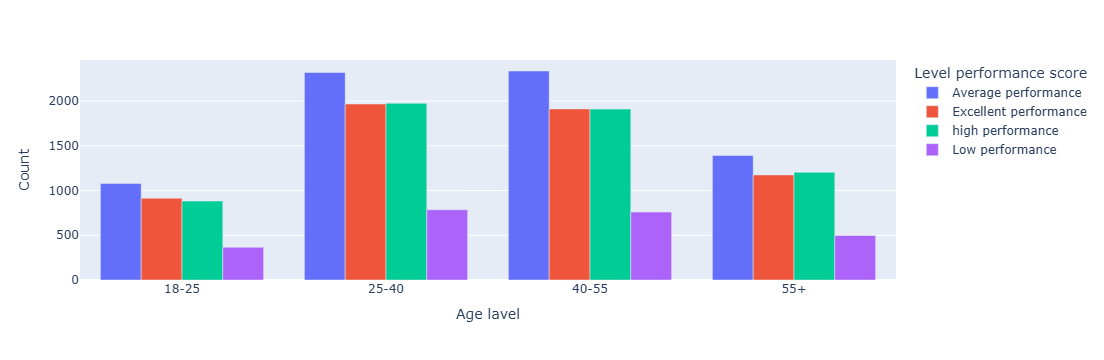

In [69]:
fig = px.bar(
    performations,
    x='Age lavel',
    y='count',
    color='level_performance_score',
    labels={'count':'Count','level_performance_score':'Level performance score'},
    barmode='group'
)
fig.show()

# How does training frequency affect employee performance scores and career growth?

In [70]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel,Age lavel
13,14,56.0,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252,No,MNC,Yes,30265,high performance,Low experience,55+
15,16,19.0,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189,Yes,NaN,No,22793,Excellent performance,Good experience,18-25
17,18,18.0,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355,No,Enterprise,Yes,35447,Low performance,Good experience,NaN
24,25,49.0,Female,Sales,146301.0,2023-03-01,17.0,Hyderabad,unknown,23.0,260,No,Enterprise,Yes,29812,Average performance,Good experience,40-55
26,27,38.0,NaN,Marketing,27114.0,2019-04-04,23.0,Bangalore,unknown,48.0,52,No,NaN,Yes,45615,Average performance,Excellent experience,25-40


In [72]:
df.shape

(24402, 18)

In [75]:
df['training_hours'] = pd.to_numeric(df['training_hours'],errors='coerce')

In [76]:
df = df.dropna(subset=['training_hours'])

In [77]:
df['training_hours']  = df['training_hours'].fillna(df['training_hours'].mean())

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\2424818800.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel,Age lavel
13,14,56.0,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252.0,No,MNC,Yes,30265,high performance,Low experience,55+
15,16,19.0,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189.0,Yes,NaN,No,22793,Excellent performance,Good experience,18-25
17,18,18.0,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355.0,No,Enterprise,Yes,35447,Low performance,Good experience,NaN
24,25,49.0,Female,Sales,146301.0,2023-03-01,17.0,Hyderabad,unknown,23.0,260.0,No,Enterprise,Yes,29812,Average performance,Good experience,40-55
26,27,38.0,NaN,Marketing,27114.0,2019-04-04,23.0,Bangalore,unknown,48.0,52.0,No,NaN,Yes,45615,Average performance,Excellent experience,25-40


In [80]:
age_vs = df.groupby('level_performance_score')['training_hours'].mean().reset_index()
age_vs

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\1277771696.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,level_performance_score,training_hours
0,Low performance,248.534645
1,Average performance,248.641379
2,high performance,248.829192
3,Excellent performance,252.550853


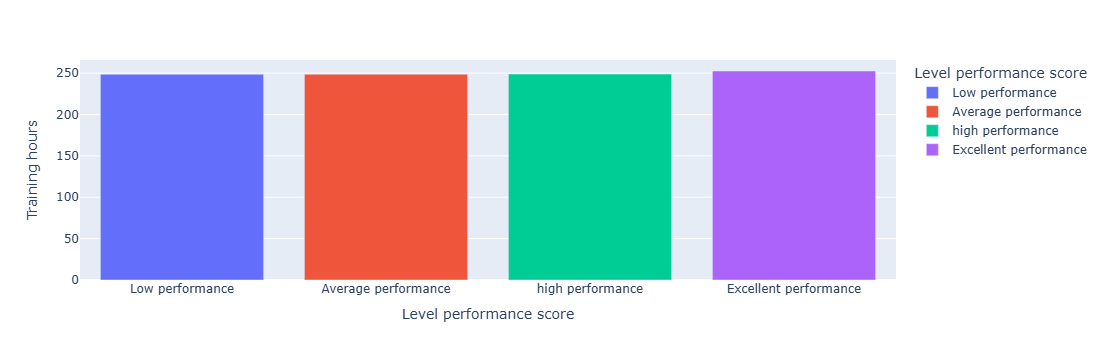

In [83]:
fig = px.bar(
    age_vs,
    x='level_performance_score',
    y='training_hours',
    color='level_performance_score',
    labels={'level_performance_score':'Level performance score','training_hours':'Training hours'}

)
fig.show()

# What patterns exist between education level and employee retention rates?


In [86]:
df.head()

,employee_id,age,gender,department,salary,joining_date,experience_years,city,education_level,performance_score,training_hours,promotion_status,company_type,attrition_flag,bonus_amount,level_performance_score,experience_lavel,Age lavel
13,14,56.0,unknown,Marketing,29587.0,2017-11-26,9.0,Mumbai,PhD,73.0,252.0,No,MNC,Yes,30265,high performance,Low experience,55+
15,16,19.0,unknown,Finance,31827.0,2013-05-11,18.0,Bangalore,Post Graduate,83.0,189.0,Yes,NaN,No,22793,Excellent performance,Good experience,18-25
17,18,18.0,NaN,HR,49190.0,2011-06-17,16.0,Hyderabad,unknown,11.0,355.0,No,Enterprise,Yes,35447,Low performance,Good experience,NaN
24,25,49.0,Female,Sales,146301.0,2023-03-01,17.0,Hyderabad,unknown,23.0,260.0,No,Enterprise,Yes,29812,Average performance,Good experience,40-55
26,27,38.0,NaN,Marketing,27114.0,2019-04-04,23.0,Bangalore,unknown,48.0,52.0,No,NaN,Yes,45615,Average performance,Excellent experience,25-40


In [87]:
df['education_level'].unique()

array(['PhD', 'Post Graduate', 'unknown', nan, 'Graduate'], dtype=object)

In [88]:
df = df.dropna(subset=['education_level'])

In [89]:
df['education_level'] = df['education_level'].fillna('unknown')

C:\Users\md salman\AppData\Local\Temp\ipykernel_12420\599411440.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
education_level = df.groupby('education_level')['training_hours'].mean().reset_index()
education_level

,education_level,training_hours
0,Graduate,247.304154
1,PhD,250.275512
2,Post Graduate,252.315681
3,unknown,251.092971


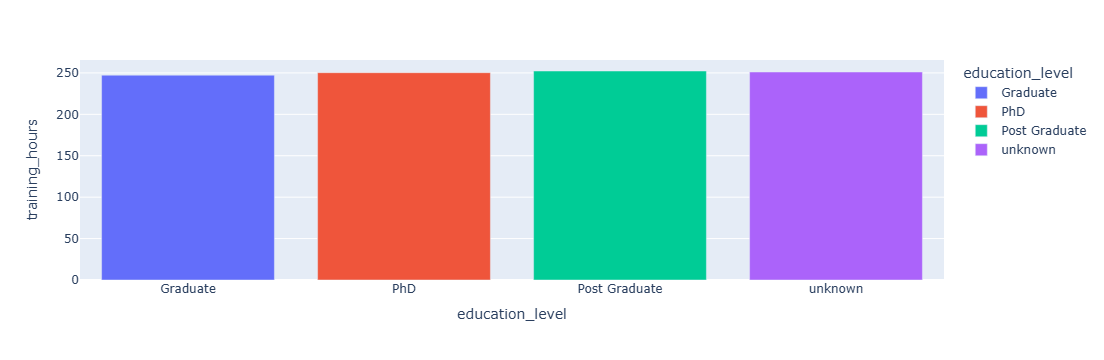

In [92]:
fig = px.bar(
    education_level,
    x='education_level',
    y='training_hours',
    color='education_level'
)
fig.show()